# Heart Attack Prediction - Cleveland vs Hungary database?

Data source: https://www.kaggle.com/datasets/imnikhilanand/heart-attack-prediction

This database contains *76 attributes*, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The *"goal"* field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Experiments with the **Cleveland database** have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). One file has been *"processed"*, that one containing the Cleveland database.

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

**Attribute information:** 

1. **age**: age in years
2. **sex**: sex (1 = male; 0 = female)
3. **cp**: chest pain type
    - *Value 1*: typical angina
    - *Value 2*: atypical angina
    - *Value 3*: non-anginal pain
    - *Value 4*: asymptomatic
4. **trestbps**: resting blood pressure (in mm Hg on admission to the
hospital)
5. **chol**: serum cholestoral in mg/dl
6. **fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. **restecg**: resting electrocardiographic results
    - *Value 0*: normal
    - *Value 1*: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - *Value 2*: showing probable or definite left ventricular hypertrophy
8. **thalach**: maximum heart rate achieved
9. **exang**: exercise induced angina (1 = yes; 0 = no)
10. **oldpeak**: ST depression induced by exercise relative to rest
11. **slope**: the slope of the peak exercise ST segment
    - *Value 1*: upsloping
    - *Value 2*: flat
    - *Value 3*: downsloping
12. **ca**: number of major vessels (0-3) colored by flourosopy
13. **thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. **num**: diagnosis of heart disease (angiographic disease status)
    - Value 0: < 50% diameter narrowing 
    - Value 1: > 50% diameter narrowing

**Source Information**:

(a) Creators:
   1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
   2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
   3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
   4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

(b) Donor: David W. Aha (aha@ics.uci.edu) (714) 856-8779

(c) Date: July, 1988

In [1]:
import pandas as pd
class_dtb = {
    'Distribution': ['0', '1', '2', '3', '4', 'Total'],
    'Cleveland': ['164', '55', '36', '35', '13', '303'],
    'Hungary': ['188', '37', '26', '28', '15', '294'],
    'Switzerland': ['8', '48', '32', '30', '5', '123'],
    'Long Beach VA': ['51', '56', '41', '42', '10', '200']
}

In [2]:
df_classdtb2 = pd.DataFrame(class_dtb)
df_classdtb2.set_index("Distribution").round(2)

,Cleveland,Hungary,Switzerland,Long Beach VA
Distribution,,,,
0,164,188,8,51
1,55,37,48,56
2,36,26,32,41
3,35,28,30,42
4,13,15,5,10
Total,303,294,123,200


## 1. Preparación del dataset

In [3]:
# LIBRERIAS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder 

In [4]:
heart_attack_path = "data.csv"
df = pd.read_csv(heart_attack_path, sep=',')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

In [6]:
df['num       '].value_counts()

num       
0    188
1    106
Name: count, dtype: int64

In [7]:
df.shape

(294, 14)

In [8]:
# Renombrar target variable
df.rename({'num       ': 'target'}, axis=1, inplace=True) 
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
# Reemplazar '?' por nan
df.replace('?', np.nan, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  293 non-null    object 
 4   chol      271 non-null    object 
 5   fbs       286 non-null    object 
 6   restecg   293 non-null    object 
 7   thalach   293 non-null    object 
 8   exang     293 non-null    object 
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    object 
 11  ca        3 non-null      object 
 12  thal      28 non-null     object 
 13  target    294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


### Detección y tratamiento de nulos

In [11]:
# Eliminar columnas
df.drop(columns=['ca', 'thal', 'slope'], inplace=True)

In [12]:
# Revisando filas
df.isnull().sum().sort_values().sort_values(ascending=False)

chol        23
fbs          8
trestbps     1
restecg      1
thalach      1
exang        1
age          0
sex          0
cp           0
oldpeak      0
target       0
dtype: int64

#### *chol*: Serum cholestoral in mg/dl

In [13]:
df['chol'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 294 entries, 0 to 293
Series name: chol
Non-Null Count  Dtype 
--------------  ----- 
271 non-null    object
dtypes: object(1)
memory usage: 2.4+ KB


In [14]:
df.chol.value_counts()

chol
246    5
230    5
275    5
238    4
196    4
      ..
468    1
259    1
100    1
210    1
393    1
Name: count, Length: 153, dtype: int64

In [15]:
df['chol'] = pd.to_numeric(df.chol, errors='coerce')

In [16]:
df.chol.info()

<class 'pandas.core.series.Series'>
RangeIndex: 294 entries, 0 to 293
Series name: chol
Non-Null Count  Dtype  
--------------  -----  
271 non-null    float64
dtypes: float64(1)
memory usage: 2.4 KB


In [17]:
df.chol.describe().round()

count    271.0
mean     251.0
std       68.0
min       85.0
25%      209.0
50%      243.0
75%      282.0
max      603.0
Name: chol, dtype: float64

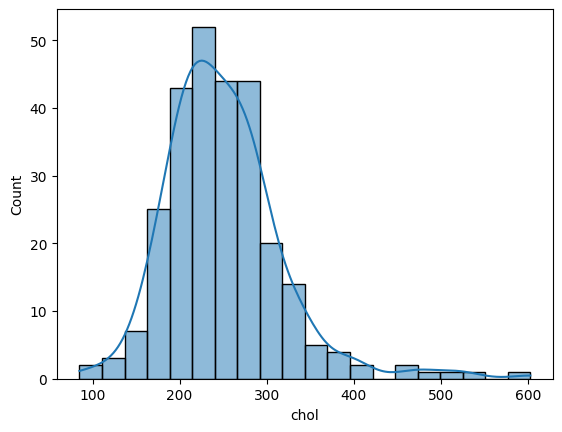

In [18]:
sns.histplot(df['chol'], bins=20, kde=True)
plt.show()

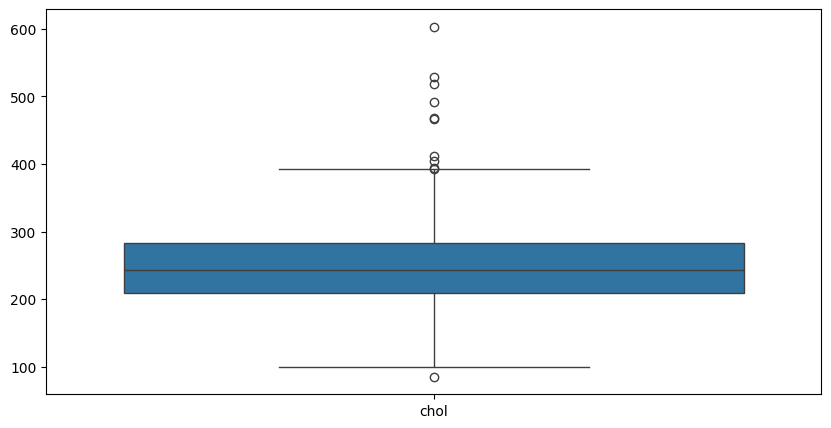

In [19]:
# Podéis hacerlo de una sola variable
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[["chol"]])
plt.show()

In [20]:
df.chol.fillna(df.chol.median(), inplace=True)

/var/folders/f1/x77kh9w17j56ckntc3dq_ztm0000gn/T/ipykernel_5928/2649995948.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.chol.fillna(df.chol.median(), inplace=True)


#### *fbs*: Fasting blood sugar > 120 mg/dl: 1 = true; 0 = false

In [21]:
df.fbs.describe()

count     286
unique      2
top         0
freq      266
Name: fbs, dtype: object

In [22]:
df.fbs.value_counts()

fbs
0    266
1     20
Name: count, dtype: int64

In [23]:
df['fbs'] = pd.to_numeric(df.fbs, errors='coerce')

In [24]:
df.fbs.fillna(0, inplace=True)  # Reemplazado vacios con moda

/var/folders/f1/x77kh9w17j56ckntc3dq_ztm0000gn/T/ipykernel_5928/2963398460.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.fbs.fillna(0, inplace=True)  # Reemplazado vacios con moda


#### Others: *restecg* (resting electrocardiographic results - 0,1,2)

In [25]:
df.isnull().sum().sort_values(ascending=False)

trestbps    1
restecg     1
thalach     1
exang       1
age         0
sex         0
cp          0
chol        0
fbs         0
oldpeak     0
target      0
dtype: int64

In [26]:
df['trestbps'] = pd.to_numeric(df['trestbps'], errors='coerce')

In [27]:
df.trestbps.fillna(df.trestbps.median(), inplace=True)

/var/folders/f1/x77kh9w17j56ckntc3dq_ztm0000gn/T/ipykernel_5928/2058663076.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.trestbps.fillna(df.trestbps.median(), inplace=True)


In [28]:
df[df.isnull().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,48,0,2,130.0,308.0,0.0,1,NaN,NaN,2.0,0
268,55,1,1,140.0,295.0,0.0,NaN,136,0,0.0,1


In [29]:
df.restecg.value_counts()

restecg
0    235
1     52
2      6
Name: count, dtype: int64

In [30]:
df.restecg.fillna(0, inplace=True)  # Reemplazado vacios con moda

/var/folders/f1/x77kh9w17j56ckntc3dq_ztm0000gn/T/ipykernel_5928/3576171895.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.restecg.fillna(0, inplace=True)  # Reemplazado vacios con moda


In [31]:
df.dropna(thresh=1, inplace=True)

In [32]:
df[df.isnull().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,48,0,2,130.0,308.0,0.0,1,NaN,NaN,2.0,0


### Detección y eliminación de duplicados

In [33]:
df.duplicated().sum()

np.int64(1)

In [34]:
df[df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
101,49,0,2,110.0,243.0,0.0,0,160,0,0.0,0
102,49,0,2,110.0,243.0,0.0,0,160,0,0.0,0


In [35]:
# Eliminamos duplicados completos primero
df = df.drop_duplicates().copy()

### Convertir obj variables to numeric

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    int64  
 1   sex       293 non-null    int64  
 2   cp        293 non-null    int64  
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    object 
 7   thalach   292 non-null    object 
 8   exang     292 non-null    object 
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 27.5+ KB


In [37]:
cols_to_numeric = ['trestbps', 'restecg', 'thalach', 'exang']
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [38]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,293.0,47.82,7.82,28.0,42.0,49.0,54.0,66.0
sex,293.0,0.73,0.45,0.0,0.0,1.0,1.0,1.0
cp,293.0,2.99,0.97,1.0,2.0,3.0,4.0,4.0
trestbps,293.0,132.65,17.58,92.0,120.0,130.0,140.0,200.0
chol,293.0,250.26,65.09,85.0,211.0,243.0,277.0,603.0
fbs,293.0,0.07,0.25,0.0,0.0,0.0,0.0,1.0
restecg,293.0,0.22,0.46,0.0,0.0,0.0,0.0,2.0
thalach,292.0,139.06,23.60,82.0,122.0,140.0,155.0,190.0
exang,292.0,0.30,0.46,0.0,0.0,0.0,1.0,1.0
oldpeak,293.0,0.59,0.91,0.0,0.0,0.0,1.0,5.0


### EDA

In [39]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'target'],
      dtype='object')

In [40]:
# Separar variables categoricas y numericas
df_num = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
df_cat = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'target']]

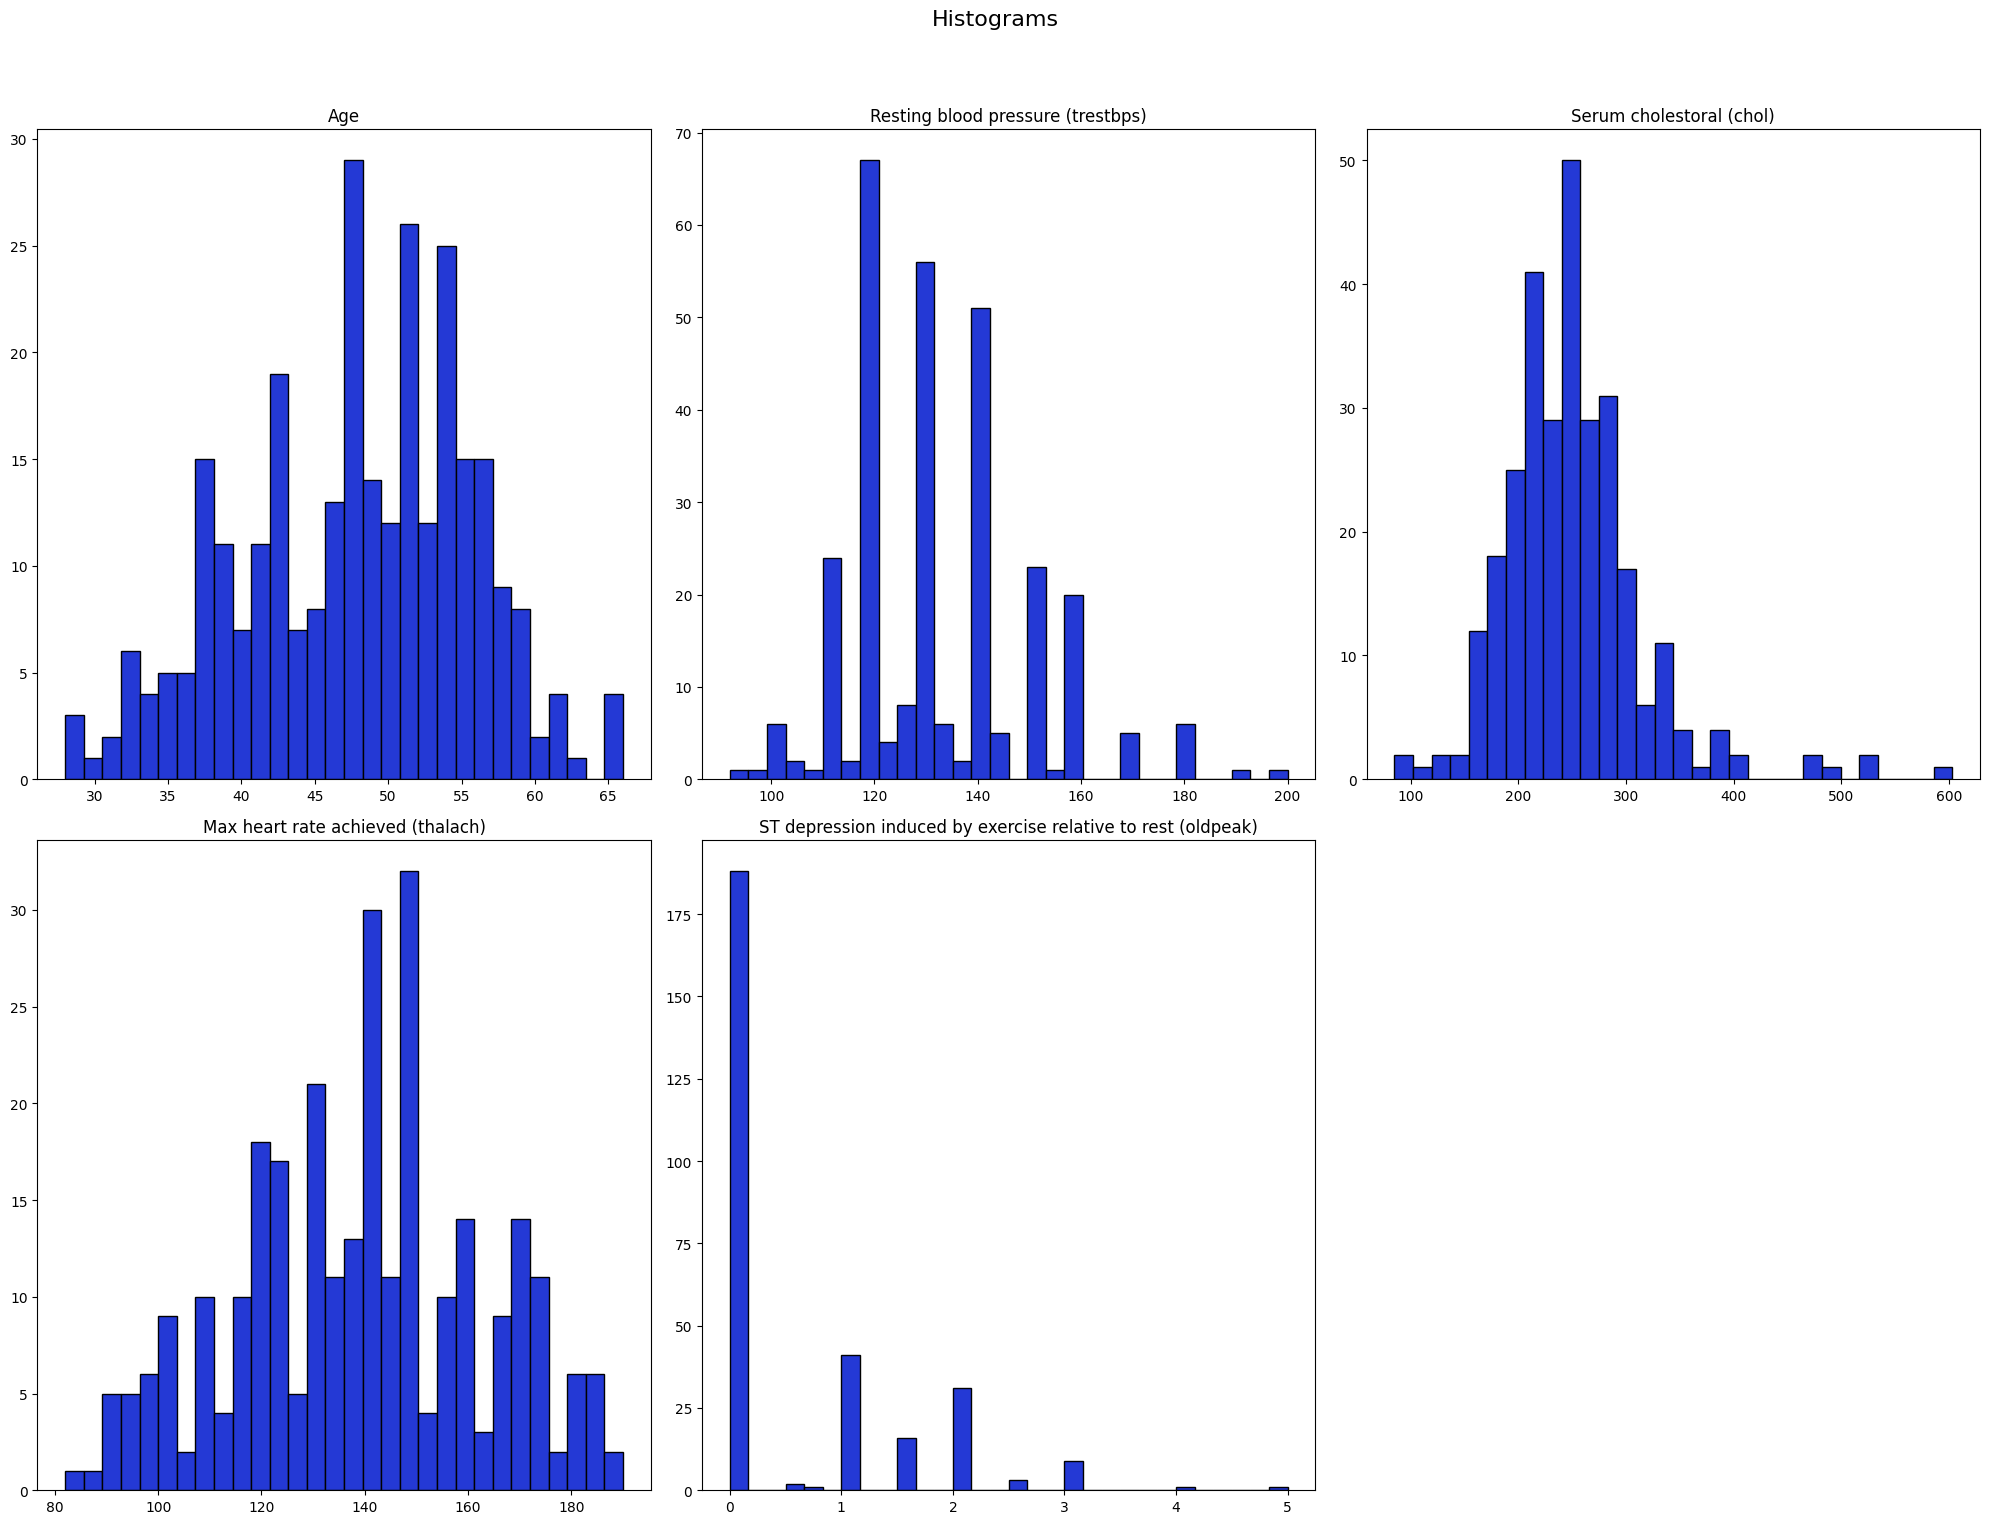

In [41]:
# Plot settings
color = '#2439d5'
nrows, ncols = 2, 3  # Grid size: 2 rows, 3 columns

# Create a Figure with a grid of Axes
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))
axes = axes.flatten()

# Plot histogram for each numeric feature
titles = [
    "Age", 
    "Resting blood pressure (trestbps)", 
    "Serum cholestoral (chol)", 
    "Max heart rate achieved (thalach)", 
    "ST depression induced by exercise relative to rest (oldpeak)"
]

for i, ax in enumerate(axes):
    if i >= len(df_num.columns):
        ax.set_visible(False)  # Hide unused plots
        continue
    ax.hist(df_num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(titles[i])  # Set title for each subplot

# Set main title for the whole plot
plt.suptitle('Histograms', fontsize=16)

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect to leave space for the suptitle

# Display the plots
plt.show()

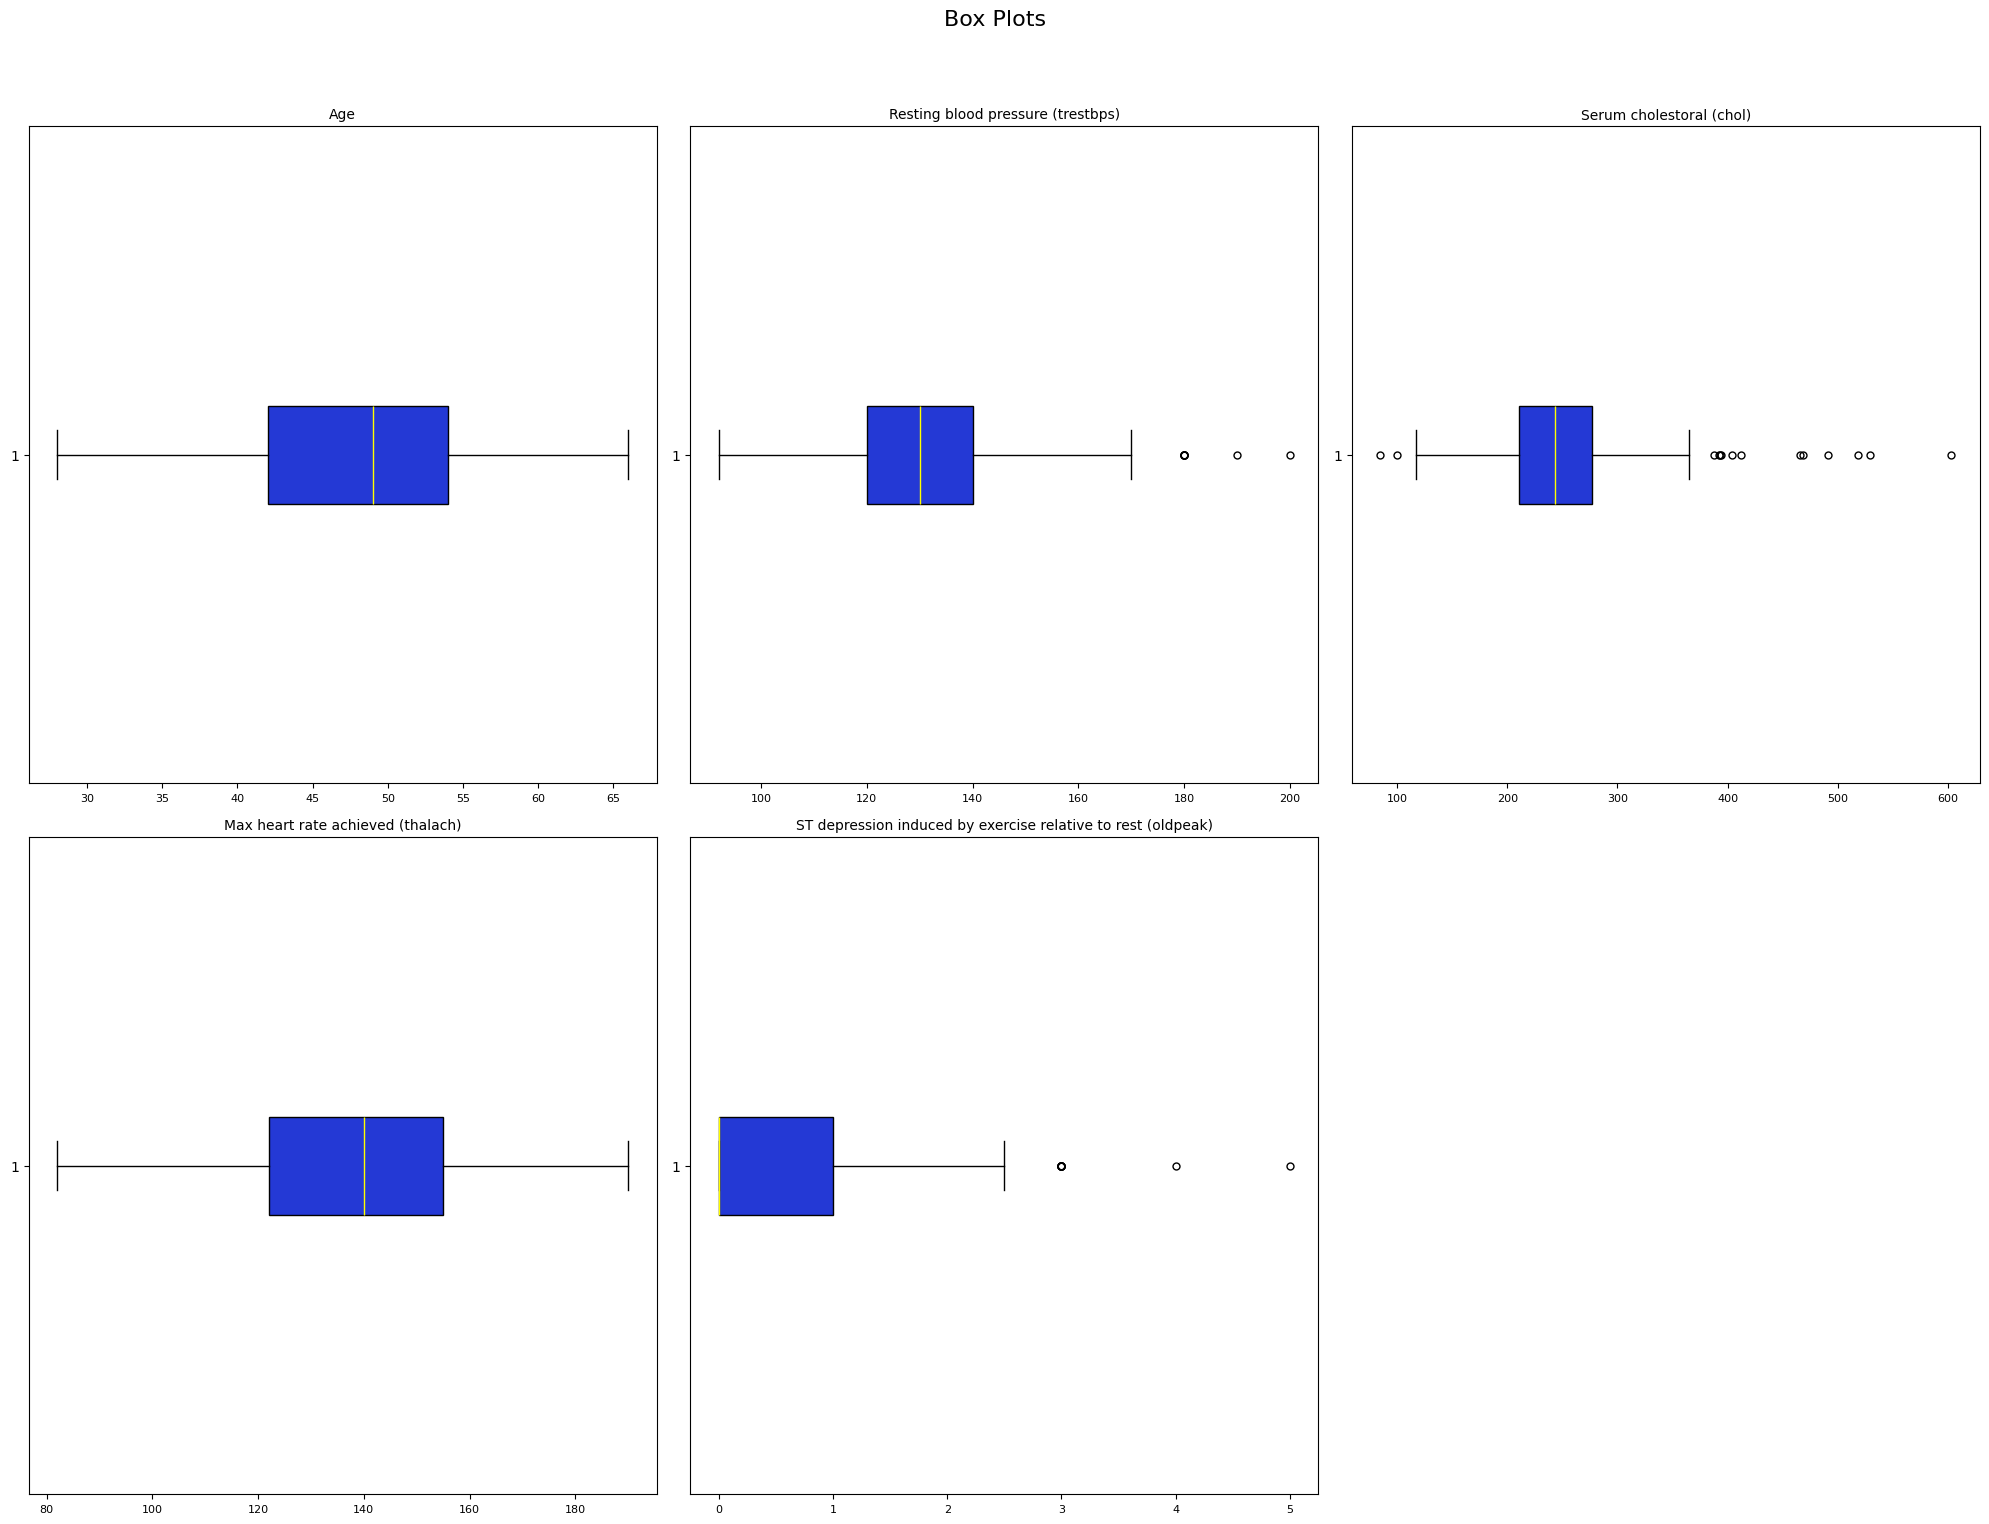

In [42]:
# Plot settings
color = '#2439d5'
nrows, ncols = 2, 3  # Grid size: 2 rows, 3 columns

# Create a Figure with a grid of Axes
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))
axes = axes.flatten()

# Titles for each box plot
titles = [
    "Age", 
    "Resting blood pressure (trestbps)", 
    "Serum cholestoral (chol)", 
    "Max heart rate achieved (thalach)", 
    "ST depression induced by exercise relative to rest (oldpeak)"
]

# Plotting box plots for each column
for i, ax in enumerate(axes):
    if i >= len(df_num.columns):
        ax.set_visible(False)  # Hide unused plots
        continue
    ax.boxplot(df_num.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(titles[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

# Set main title for the whole plot
plt.suptitle('Box Plots', fontsize=16)

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect to leave space for the suptitle

# Display the plots
plt.show()

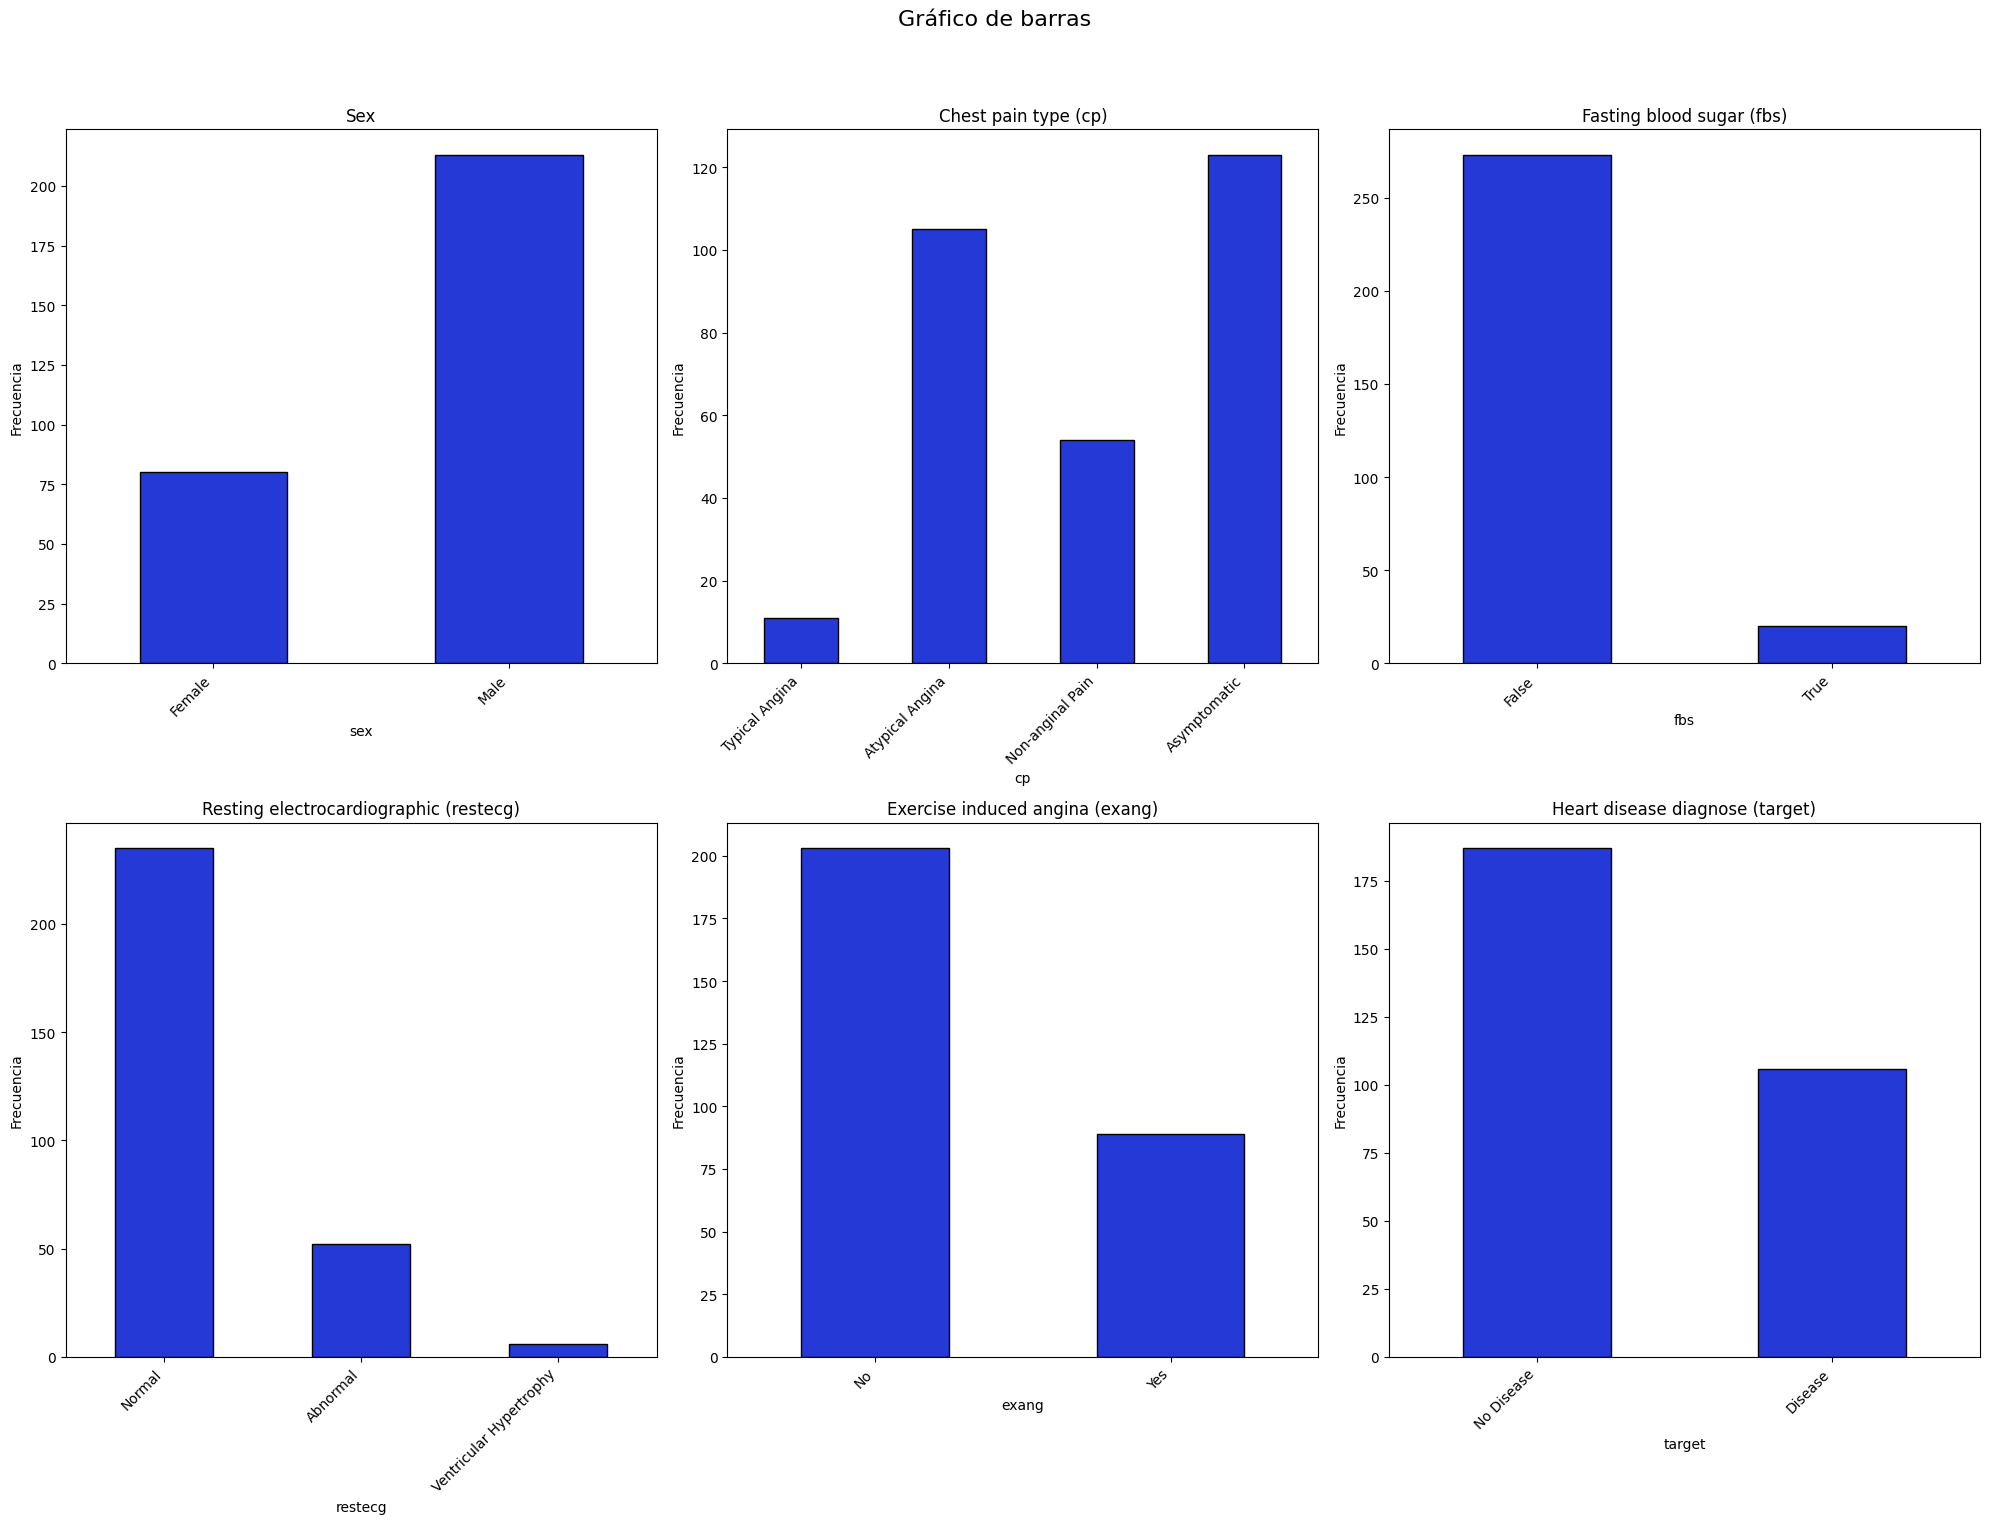

In [43]:
# Configuration of color and grid size
color = '#2439d5'
nrows, ncols = 2, 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))
axes = axes.flatten()

# Define titles for each categorical feature
titles = [
    "Sex", 
    "Chest pain type (cp)",
    "Fasting blood sugar (fbs)", 
    "Resting electrocardiographic (restecg)", 
    "Exercise induced angina (exang)", 
    "Heart disease diagnose (target)"
]

# Define the label mapping for each categorical feature
xlabels_list = [
    ['Female', 'Male'],
    ['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'],
    ['False', 'True'],
    ['Normal', 'Abnormal', 'Ventricular Hypertrophy'],
    ['No', 'Yes'],
    ['No Disease', 'Disease']
]

# Plot each categorical feature
for i, ax in enumerate(axes):
    if i >= len(df_cat.columns):
        ax.set_visible(False)  # Hide unused subplots
        continue
    
    # Generate bar plot
    df_cat.iloc[:, i].value_counts().sort_index().plot(kind='bar', ax=ax, color=color, edgecolor='black')

    # Set the titles and custom x-tick labels
    ax.set_title(titles[i])  # Set title for each subplot
    ax.set_ylabel('Frecuencia')
    ax.set_xticklabels(xlabels_list[i], rotation=45, ha='right')  # Set custom x-tick labels

# Set a main title for the whole plot
plt.suptitle('Gráfico de barras', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

In [44]:
# One-hot encoder
# Generar dummies para la columna 'cp'
dummies_cp = pd.get_dummies(df[["cp"]], columns=["cp"], drop_first=True)*1

# Añadir las columnas dummy al original DataFrame
df = pd.concat([df, dummies_cp], axis=1)

In [45]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'target', 'cp_2', 'cp_3', 'cp_4'],
      dtype='object')

In [46]:
# Eliminar columna 'cp' original
df.drop(columns=['cp'], inplace=True)

## 2. Balancear data

In [47]:
df.target.value_counts()

target
0    187
1    106
Name: count, dtype: int64

In [48]:
hearta_df = df[df.target==1]
no_hearta_df = df[df.target ==0].sample(len(hearta_df))
df_balanceado = pd.concat([hearta_df, no_hearta_df])

In [49]:
df_balanceado.target.value_counts()

target
1    106
0    106
Name: count, dtype: int64

## 3. X-y Split

In [50]:
y = df_balanceado['target']
X = df_balanceado.drop(columns=['target'], axis=1)
print(y.shape, X.shape)

(212,) (212, 12)


In [51]:
df_balanceado.isnull().sum()

age         0
sex         0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
cp_2        0
cp_3        0
cp_4        0
dtype: int64

## 4. Train - test data (80/20)

In [52]:
# Librerias clasificacion
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((169, 12), (43, 12), (169,), (43,))

## 5. Modelos

In [55]:
# Logistic regression
mod_lr1 = LogisticRegression(max_iter=1000)
mod_lr1.fit(X_train, y_train) #Entrenamiento
y_pred_lr1 = mod_lr1.predict(X_test) 

# K-Nearest Neighbors (KNN)
mod_knn5 = KNeighborsClassifier(n_neighbors=5)
mod_knn5.fit(X_train, y_train) #Entrenamiento
y_pred_knn5 = mod_knn5.predict(X_test) #Predicción

# Decision Tree
mod_dt1 = DecisionTreeClassifier(random_state=42)
mod_dt1.fit(X_train, y_train) #Entrenamiento
y_pred_dt1 = mod_dt1.predict(X_test) #Predicción

# Random Forest
mod_rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
mod_rf1.fit(X_train, y_train) #Entrenamiento
y_pred_rf1 = mod_rf1.predict(X_test) #Predicción

/Users/saraynes.gs/Documents/Ironhack/BigData/env_big_data/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 6. Evaluación

In [56]:
# Mapping of models to their predictions
predictions = {
    'lr1': y_pred_lr1,
    'knn5': y_pred_knn5,
    'dt1': y_pred_dt1,
    'rf1': y_pred_rf1
}

# Initialize lists to store the metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Loop over the models and calculate metrics
for name, pred in predictions.items():
    accuracies.append(accuracy_score(y_test, pred))
    precisions.append(precision_score(y_test, pred))
    recalls.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))

# Create DataFrame with the metrics
metrics = {
    'Model': ['Logistic Reg', 'KNN', 'Decision Tree', 'Random Forest'],
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 score': f1_scores
}

df_metrics = pd.DataFrame(metrics)
print(df_metrics.set_index("Model").round(2))  # Display the DataFrame

               Accuracy  Precision  Recall  F1 score
Model                                               
Logistic Reg       0.81       0.74    0.89      0.81
KNN                0.65       0.59    0.68      0.63
Decision Tree      0.72       0.64    0.84      0.73
Random Forest      0.84       0.77    0.89      0.83


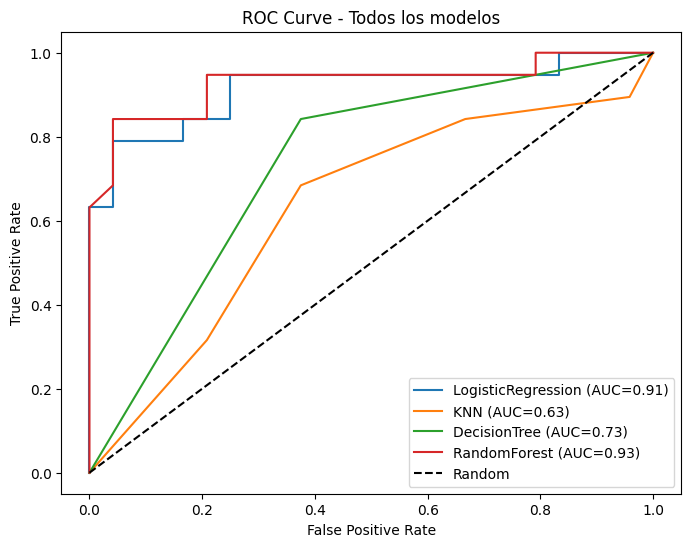

In [57]:
# Initialize figure for plotting
plt.figure(figsize=(8, 6))

# Dictionary containing model names and instances
for nombre, modelo in {
    'LogisticRegression': mod_lr1,
    'KNN': mod_knn5,
    'DecisionTree': mod_dt1,
    'RandomForest': mod_rf1
}.items():
    # Check if model has predict_proba attribute
    if hasattr(modelo, "predict_proba"):
        # Calculate probabilities and ROC curve metrics
        y_pred_proba = modelo.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)  # Use roc_curve directly
        auc = roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f"{nombre} (AUC={auc:.2f})")

# Plot the diagonal line for baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Todos los modelos')

# Add legend
plt.legend()

# Display plot
plt.show()

## 7. Standarizando las X

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
X_train.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'cp_2', 'cp_3', 'cp_4'],
      dtype='object')

In [60]:
X_train.isnull().sum()

age         0
sex         0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
cp_2        0
cp_3        0
cp_4        0
dtype: int64

In [61]:
X_train.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,cp_2,cp_3,cp_4
10,34,1,150.0,214.0,0.0,1,168.0,0.0,0.0,1,0,0
134,53,1,120.0,243.0,0.0,0,132.0,0.0,0.0,1,0,0
257,48,0,138.0,214.0,0.0,0,108.0,1.0,1.5,0,0,1
272,56,1,150.0,230.0,0.0,1,124.0,1.0,1.5,0,0,1
285,49,1,150.0,222.0,0.0,0,122.0,0.0,2.0,0,0,1


### Standarizando las variables numericas

In [62]:
X_train_num = X_train[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
X_train_cat = X_train[['sex', 'cp_2', 'cp_3', 'cp_4', 'fbs', 'restecg', 'exang']]

X_test_num = X_test[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
X_test_cat = X_test[['sex', 'cp_2', 'cp_3', 'cp_4', 'fbs', 'restecg', 'exang']]

In [63]:
X_test_num.isnull().sum()

age         0
trestbps    0
chol        0
thalach     0
oldpeak     0
dtype: int64

In [64]:
# Scale the numerical data
scaler = StandardScaler()
X_train_n_scaled = pd.DataFrame(scaler.fit_transform(X_train_num), columns=X_train_num.columns, index=X_train_num.index)
X_test_n_scaled = pd.DataFrame(scaler.fit_transform(X_test_num), columns=X_test_num.columns, index=X_test_num.index)


In [65]:
X_train_n_scaled.isnull().sum()

age         0
trestbps    0
chol        0
thalach     0
oldpeak     0
dtype: int64

In [66]:
X_test_n_scaled.isnull().sum()

age         0
trestbps    0
chol        0
thalach     0
oldpeak     0
dtype: int64

In [67]:
# Combine numerical and categorical data using join
X_train_scaled = X_train_cat.join(X_train_n_scaled)
X_test_scaled  = X_test_cat.join(X_test_n_scaled)

In [68]:
X_train_scaled.head()

,sex,cp_2,cp_3,cp_4,fbs,restecg,exang,age,trestbps,chol,thalach,oldpeak
10,1,1,0,0,0.0,1,0.0,-1.850376,0.877743,-0.544834,1.380252,-0.722707
134,1,1,0,0,0.0,0,0.0,0.545413,-0.720159,-0.064749,-0.165102,-0.722707
257,0,0,0,1,0.0,0,1.0,-0.085058,0.238582,-0.544834,-1.195338,0.791394
272,1,0,0,1,0.0,1,1.0,0.923696,0.877743,-0.279960,-0.508514,0.791394
285,1,0,0,1,0.0,0,0.0,0.041037,0.877743,-0.412397,-0.594367,1.296094


In [69]:
X_test_scaled.head()

,sex,cp_2,cp_3,cp_4,fbs,restecg,exang,age,trestbps,chol,thalach,oldpeak
218,1,0,0,1,0.0,0,1.0,1.134171,0.613990,-0.846867,-0.335572,2.528526
139,1,0,0,1,0.0,0,0.0,0.849802,0.613990,-0.368169,0.725427,-0.749664
32,1,1,0,0,0.0,0,1.0,-1.140784,-0.670758,-0.858265,0.937627,0.343066
263,1,0,0,1,0.0,0,1.0,0.707617,0.613990,1.466843,-0.590212,1.435796
248,1,0,0,1,0.0,0,1.0,1.418540,1.256363,-0.231398,-1.948290,2.528526


In [70]:
X_train.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,cp_2,cp_3,cp_4
10,34,1,150.0,214.0,0.0,1,168.0,0.0,0.0,1,0,0
134,53,1,120.0,243.0,0.0,0,132.0,0.0,0.0,1,0,0
257,48,0,138.0,214.0,0.0,0,108.0,1.0,1.5,0,0,1
272,56,1,150.0,230.0,0.0,1,124.0,1.0,1.5,0,0,1
285,49,1,150.0,222.0,0.0,0,122.0,0.0,2.0,0,0,1


In [71]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((169, 12), (43, 12), (169,), (43,))

### Modelos con variables numericas Standarizadas

In [72]:
# Modelos
# Logistic regression
mod_scaled_lr1 = LogisticRegression(max_iter=1000)
mod_scaled_lr1.fit(X_train_scaled, y_train) #Entrenamiento
y_pred_scaled_lr1 = mod_scaled_lr1.predict(X_test_scaled) 

# K-Nearest Neighbors (KNN)
mod_scaled_knn5 = KNeighborsClassifier(n_neighbors=5)
mod_scaled_knn5.fit(X_train_scaled, y_train) #Entrenamiento
y_pred_scaled_knn5 = mod_scaled_knn5.predict(X_test_scaled) #Predicción

# Decision Tree
mod_scaled_dt1 = DecisionTreeClassifier(random_state=42)
mod_scaled_dt1.fit(X_train_scaled, y_train) #Entrenamiento
y_pred_scaled_dt1 = mod_scaled_dt1.predict(X_test_scaled) #Predicción

# Random Forest
mod_scaled_rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
mod_scaled_rf1.fit(X_train_scaled, y_train) #Entrenamiento
y_pred_scaled_rf1 = mod_scaled_rf1.predict(X_test_scaled) #Predicción

### Evaluación de modelos con variables numericas Standarizadas

In [73]:
# Mapping of models to their predictions
predictions = {
    'lr1': y_pred_scaled_lr1,
    'knn5': y_pred_scaled_knn5,
    'dt1': y_pred_scaled_dt1,
    'rf1': y_pred_scaled_rf1
}

# Initialize lists to store the metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Loop over the models and calculate metrics
for name, pred in predictions.items():
    accuracies.append(accuracy_score(y_test, pred))
    precisions.append(precision_score(y_test, pred))
    recalls.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))

# Create DataFrame with the metrics
metrics = {
    'Model': ['Logistic Reg', 'KNN', 'Decision Tree', 'Random Forest'],
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 score': f1_scores
}

df_metrics = pd.DataFrame(metrics)
print(df_metrics.set_index("Model").round(2))  # Display the DataFrame

               Accuracy  Precision  Recall  F1 score
Model                                               
Logistic Reg       0.81       0.76    0.84      0.80
KNN                0.86       0.84    0.84      0.84
Decision Tree      0.72       0.67    0.74      0.70
Random Forest      0.81       0.76    0.84      0.80


### ROC curve con variables numericas Standarizadas

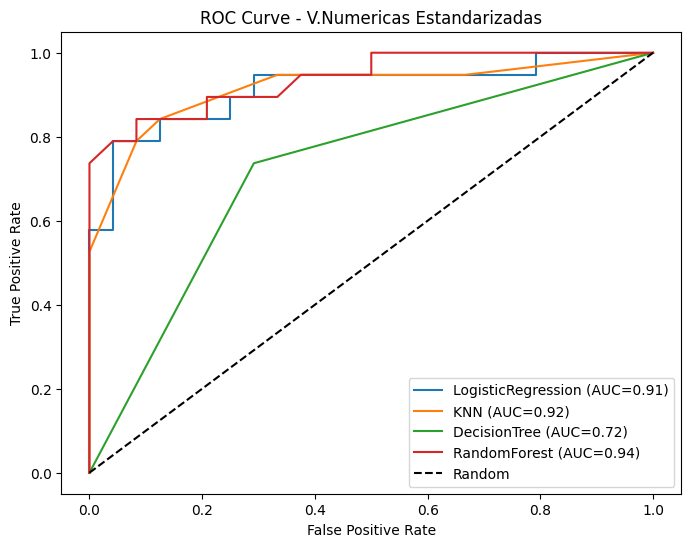

In [74]:
# Initialize figure for plotting
plt.figure(figsize=(8, 6))

# Dictionary containing model names and instances
for nombre, modelo in {
    'LogisticRegression': mod_scaled_lr1,
    'KNN': mod_scaled_knn5,
    'DecisionTree': mod_scaled_dt1,
    'RandomForest': mod_scaled_rf1
}.items():
    # Check if model has predict_proba attribute
    if hasattr(modelo, "predict_proba"):
        # Calculate probabilities and ROC curve metrics
        y_pred_proba = modelo.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)  # Use roc_curve directly
        auc = roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f"{nombre} (AUC={auc:.2f})")

# Plot the diagonal line for baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - V.Numericas Estandarizadas')

# Add legend
plt.legend()

# Display plot
plt.show()

## 8. Normalizando las X

In [75]:
X_train_cat

,sex,cp_2,cp_3,cp_4,fbs,restecg,exang
10,1,1,0,0,0.0,1,0.0
134,1,1,0,0,0.0,0,0.0
257,0,0,0,1,0.0,0,1.0
272,1,0,0,1,0.0,1,1.0
285,1,0,0,1,0.0,0,0.0
...,...,...,...,...,...,...,...
142,0,1,0,0,0.0,0,0.0
202,1,0,0,1,0.0,0,0.0
280,1,0,0,1,0.0,0,1.0
187,1,1,0,0,0.0,0,0.0


In [76]:
X_train_log = np.log1p(X_train_num)  # np.log1p is useful to handle zero values in your data
X_test_log = np.log1p(X_test_num)

In [77]:
# Combine numerical and categorical data using join
X_train_log = X_train_cat.join(X_train_log)
X_test_log = X_test_cat.join(X_test_log)

In [78]:
X_train_log.shape, X_test_log.shape, y_train.shape, y_test.shape

((169, 12), (43, 12), (169,), (43,))

### Modelos con variables numericas Normalizadas

In [79]:
# Modelos
# Logistic regression
mod_log_lr1 = LogisticRegression(max_iter=1000)
mod_log_lr1.fit(X_train_log, y_train) #Entrenamiento
y_pred_log_lr1 = mod_log_lr1.predict(X_test_log) 

# K-Nearest Neighbors (KNN)
mod_log_knn5 = KNeighborsClassifier(n_neighbors=5)
mod_log_knn5.fit(X_train_log, y_train) #Entrenamiento
y_pred_log_knn5 = mod_log_knn5.predict(X_test_log) #Predicción

# Decision Tree
mod_log_dt1 = DecisionTreeClassifier(random_state=42)
mod_log_dt1.fit(X_train_log, y_train) #Entrenamiento
y_pred_log_dt1 = mod_log_dt1.predict(X_test_log) #Predicción

# Random Forest
mod_log_rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
mod_log_rf1.fit(X_train_log, y_train) #Entrenamiento
y_pred_log_rf1 = mod_log_rf1.predict(X_test_log) #Predicción

### Evaluación de modelos con variables numericas Normalizadas

In [80]:
# Mapping of models to their predictions
predictions = {
    'lr1': y_pred_log_lr1,
    'knn5': y_pred_log_knn5,
    'dt1': y_pred_log_dt1,
    'rf1': y_pred_log_rf1
}

# Initialize lists to store the metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Loop over the models and calculate metrics
for name, pred in predictions.items():
    accuracies.append(accuracy_score(y_test, pred))
    precisions.append(precision_score(y_test, pred))
    recalls.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))

# Create DataFrame with the metrics
metrics = {
    'Model': ['Logistic Reg', 'KNN', 'Decision Tree', 'Random Forest'],
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 score': f1_scores
}

df_metrics = pd.DataFrame(metrics)
print(df_metrics.set_index("Model").round(2))  # Display the DataFrame

               Accuracy  Precision  Recall  F1 score
Model                                               
Logistic Reg       0.79       0.71    0.89      0.79
KNN                0.72       0.67    0.74      0.70
Decision Tree      0.67       0.60    0.79      0.68
Random Forest      0.81       0.76    0.84      0.80


### ROC curve con variables numericas Normalizadas

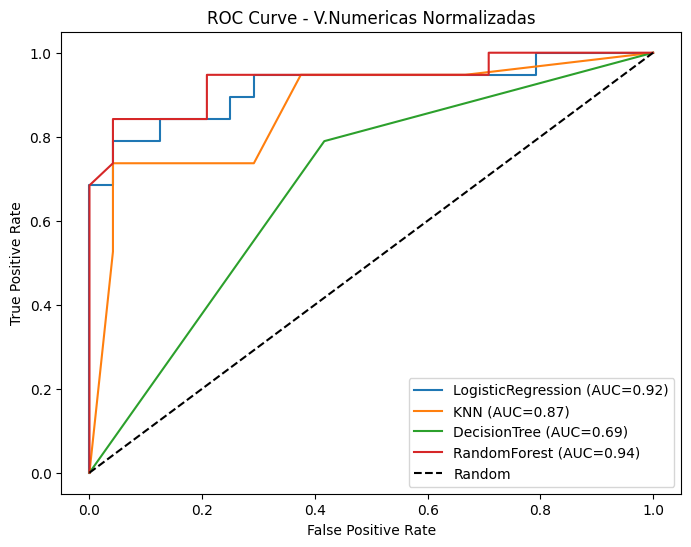

In [81]:
# Initialize figure for plotting
plt.figure(figsize=(8, 6))

# Dictionary containing model names and instances
for nombre, modelo in {
    'LogisticRegression': mod_log_lr1,
    'KNN': mod_log_knn5,
    'DecisionTree': mod_log_dt1,
    'RandomForest': mod_log_rf1
}.items():
    # Check if model has predict_proba attribute
    if hasattr(modelo, "predict_proba"):
        # Calculate probabilities and ROC curve metrics
        y_pred_proba = modelo.predict_proba(X_test_log)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)  # Use roc_curve directly
        auc = roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f"{nombre} (AUC={auc:.2f})")

# Plot the diagonal line for baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - V.Numericas Normalizadas')

# Add legend
plt.legend()

# Display plot
plt.show()

## 9. Feature importance

### Feature importance Linear Regression Standarized Variables

In [86]:
mod_escaled_lr1

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


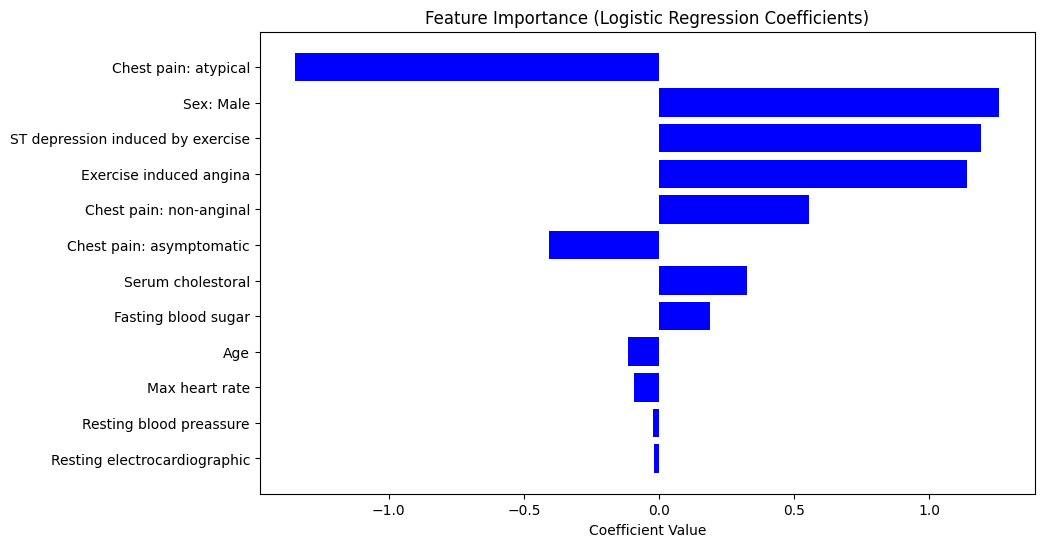

In [93]:
# Extract the coefficients and feature names
coefficients = mod_scaled_lr1.coef_[0]  # For binary classification, coefficients is a 2D array
features = X_train_scaled.columns

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Sort by absolute value of the coefficient
feature_importance['AbsCoefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='AbsCoefficient', ascending=False)

# Define custom labels for the y-axis
custom_labels = [
    "Chest pain: atypical",
    "Sex: male",
    "ST depression induced by exercise",
    "Exercise induced angina",
    "Chest pain: non-anginal",
    "Chest pain: asymptomatic",
    "Serum cholestoral",
    "Fasting blood sugar",
    "Age",
    "Max heart rate",
    "Resting blood preassure",
    "Resting electrocardiographic"
]

# Plot the feature importance with custom labels
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='blue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.yticks(ticks=range(len(custom_labels)), labels=custom_labels)
plt.gca().invert_yaxis()  # Largest first
plt.show()

### Feature importance Random Forest Normalized Variables

In [95]:
mod_log_rf1

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [96]:
feature_names = list(X_train_log.columns)
importances = mod_log_rf1.feature_importances_
indices = np.argsort(importances)[::-1] # sorts indices of importances in descending order

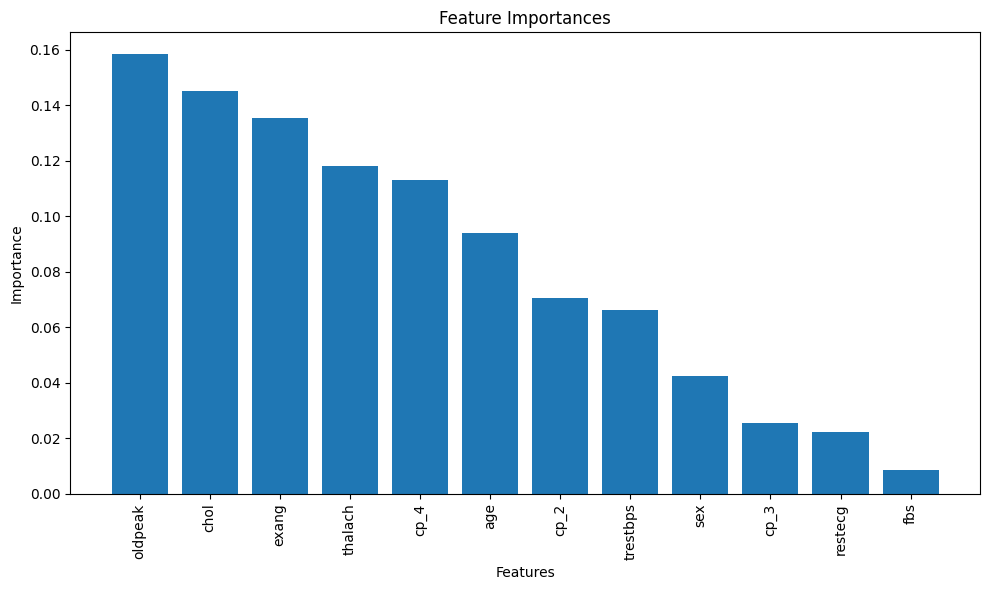

In [97]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

## 10. Hyperparameter Tuning

### Hyperparameter tuning Linear Regression Standarized Variables

In [94]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # 'l1' is used with the 'liblinear' solver
    'solver': ['liblinear', 'saga']  # 'saga' works with both 'l1' and 'l2'
}

# Initialize GridSearchCV
grid_search = GridSearchCV(mod_scaled_lr1, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# Evaluate on the test set
y_pred = grid_search.best_estimator_.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Best Cross-validation Accuracy: 0.7989304812834225
              precision    recall  f1-score   support

           0       0.86      0.79      0.83        24
           1       0.76      0.84      0.80        19

    accuracy                           0.81        43
   macro avg       0.81      0.82      0.81        43
weighted avg       0.82      0.81      0.81        43



Parameters:

- **C**: Regularization strength parameter. Smaller values specify stronger regularization.
- **penalty**: Type of regularization ('l1' for Lasso and 'l2' for Ridge).
- **solver**: Algorithm to use in the optimization problem. liblinear works with small datasets and supports 'l1'.

### Hyperparameter tuning Random Forest model with Normalized Variables

In [98]:
parameters = {
    'bootstrap': [True],
    'max_depth': [20, 40, 60, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5],
    'n_estimators': [200, 400, 600]
}

In [99]:
mod_log_rf1

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [100]:
model = GridSearchCV(mod_log_rf1, parameters)
model.fit(X_train_log, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'bootstrap': [True], 'max_depth': [20, 40, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,600


In [101]:
predictions = model.predict(X_test_log)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        24
           1       0.80      0.84      0.82        19

    accuracy                           0.84        43
   macro avg       0.83      0.84      0.84        43
weighted avg       0.84      0.84      0.84        43



In [103]:
# Display the best parameters
print("Best Parameters:", model.best_params_)
print("Best Cross-validation Accuracy:", model.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 600}
Best Cross-validation Accuracy: 0.7989304812834225
